In [33]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from itertools import permutations, product
import warnings
warnings.filterwarnings("ignore")
from utils.utilities import *
from utils.model import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
cmap = mpl.cm.get_cmap('viridis')

import itertools

import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import *
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
inducers = {
    'ara': np.array([0, 0.203125, 0.8125, 3.25, 13, 52]),
    'ohc14': np.array([0, 0.15625, 0.625, 2.5, 10, 40])
}
folder = '089-PBAD-PCin-E20-induction-matrix'
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Positive']


In [3]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

In [4]:
v1 = final_data[final_data.index.str.startswith('PBAD-PCin-E20')].reset_index()
v1['i1'] = v1['name'].str[-2]
v1['i2'] = v1['name'].str[-1]
v1 = v1[['i1', 'i2', '8 h ']].sort_values(['i1', 'i2']).reset_index(drop=True)
v1.rename(columns={'8 h ': 'PBAD-PCin-E20_v1'}, inplace=True)
v1['i1'] = v1['i1'].astype(int)
v1['i2'] = v1['i2'].astype(int)
v1['i1'] = v1['i1'].apply(lambda x: inducers['ara'][x])
v1['i2'] = v1['i2'].apply(lambda x: inducers['ohc14'][x])
v1

,i1,i2,PBAD-PCin-E20_v1
0,0.000000,0.00000,0.012770
1,0.000000,0.15625,0.022535
2,0.000000,0.62500,0.021624
3,0.000000,2.50000,0.018534
4,0.000000,10.00000,0.018482
5,0.000000,40.00000,0.017883
6,0.203125,0.00000,0.019475
7,0.203125,0.15625,0.059929
8,0.203125,0.62500,0.085643
9,0.203125,2.50000,0.075026


In [5]:
inducers = {
    'ara': np.array([0, 0.05078125, 0.203125, 0.8125, 3.25, 13]),
    'ohc14': np.array([0, 0.0390625, 0.15625, 0.625, 2.5, 10])
}

In [6]:
folder = '095-C60-C63-induction-matrix'
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Positive']


In [7]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

In [8]:
v2 = final_data[final_data.index.str.startswith('PBAD-PCin-E20-v2')].reset_index()
v2['i1'] = v2['name'].str[-2]
v2['i2'] = v2['name'].str[-1]
v2 = v2[['i1', 'i2', '8 h ']].sort_values(['i1', 'i2']).reset_index(drop=True)#.set_index(data['i1'] + data['i2'])
v2.rename(columns={'8 h ': 'PBAD-PCin-E20_v2'}, inplace=True)
data = v2.copy()

In [9]:
folder = '096-C66-C72-induction-matrix'
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Positive']


In [10]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

In [11]:
v3 = final_data[final_data.index.str.startswith('PBAD-PCin-E20-v3')].reset_index()
v3['i1'] = v3['name'].str[-2]
v3['i2'] = v3['name'].str[-1]
v3 = v3[['i1', 'i2', '8 h ']].sort_values(['i1', 'i2']).reset_index(drop=True)
v3.rename(columns={'8 h ': 'PBAD-PCin-E20_v3'}, inplace=True)
data = pd.merge(data, v3, on=['i1', 'i2'], how='inner')

In [12]:
v4 = final_data[final_data.index.str.startswith('PBAD-PCin-E20-v4')].reset_index()
v4['i1'] = v4['name'].str[-2]
v4['i2'] = v4['name'].str[-1]
v4 = v4[['i1', 'i2', '8 h ']].sort_values(['i1', 'i2']).reset_index(drop=True)
v4.rename(columns={'8 h ': 'PBAD-PCin-E20_v4'}, inplace=True)
data = pd.merge(data, v4, on=['i1', 'i2'], how='inner')

In [13]:
folder = '097-C78-C84-induction-matrix'
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Positive']


In [14]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

In [15]:
v5 = final_data[final_data.index.str.startswith('PBAD-PCin-E20-v5')].reset_index()
v5['i1'] = v5['name'].str[-2]
v5['i2'] = v5['name'].str[-1]
v5 = v5[['i1', 'i2', '8 h ']].sort_values(['i1', 'i2']).reset_index(drop=True)
v5.rename(columns={'8 h ': 'PBAD-PCin-E20_v5'}, inplace=True)
data = pd.merge(data, v5, on=['i1', 'i2'], how='inner')

In [16]:
v6 = final_data[final_data.index.str.startswith('PBAD-PCin-E20-v6')].reset_index()
v6['i1'] = v6['name'].str[-2]
v6['i2'] = v6['name'].str[-1]
v6 = v6[['i1', 'i2', '8 h ']].sort_values(['i1', 'i2']).reset_index(drop=True)
v6.rename(columns={'8 h ': 'PBAD-PCin-E20_v6'}, inplace=True)
data = pd.merge(data, v6, on=['i1', 'i2'], how='inner')

In [17]:
data['i1'] = data['i1'].astype(int)
data['i2'] = data['i2'].astype(int)
data['i1'] = data['i1'].apply(lambda x: inducers['ara'][x])
data['i2'] = data['i2'].apply(lambda x: inducers['ohc14'][x])
data

,i1,i2,PBAD-PCin-E20_v2,PBAD-PCin-E20_v3,PBAD-PCin-E20_v4,PBAD-PCin-E20_v5,PBAD-PCin-E20_v6
0,0.000000,0.000000,0.009705,0.025524,0.021144,0.034879,0.031534
1,0.000000,0.039062,0.009822,0.028711,0.021186,0.033458,0.034133
2,0.000000,0.156250,0.016286,0.048760,0.046253,0.044379,0.045353
3,0.000000,0.625000,0.019066,0.039107,0.043417,0.045552,0.050884
4,0.000000,2.500000,0.017739,0.032422,0.041811,0.042979,0.053409
5,0.000000,10.000000,0.018010,0.036299,0.045330,0.041533,0.061411
6,0.050781,0.000000,0.010681,0.024800,0.022419,0.043663,0.037328
7,0.050781,0.039062,0.009936,0.028497,0.022800,0.038744,0.039779
8,0.050781,0.156250,0.018670,0.057844,0.051480,0.051651,0.056709
9,0.050781,0.625000,0.023279,0.044714,0.059311,0.057905,0.066480


In [18]:
v1.rename(columns={'i1': 'ara', 'i2': 'ohc14'}, inplace=True)
data.rename(columns={'i1': 'ara', 'i2': 'ohc14'}, inplace=True)

In [19]:
hill_params = {
    'pbad': [0.52, -0.06, 0.15, -2.06],
    'pcin': [-0.32, 0.91, 0.29, -3.11],
    'psalttc': [-0.46, 1.76, 0.29, -1.71]
}
pro_ind = {
    'ara': 'pbad',
    'ohc14': 'pcin',
    'sal': 'psalttc'
}
ind_pro = {
    'pbad': 'ara',
    'pcin': 'ohc14',
    'psalttc': 'sal'
}

In [20]:
filenames = ['PBAD-PCin-E20_v1', 'PBAD-PCin-E20_v2', 'PBAD-PCin-E20_v3',
             'PBAD-PCin-E20_v4', 'PBAD-PCin-E20_v5', 'PBAD-PCin-E20_v6',]

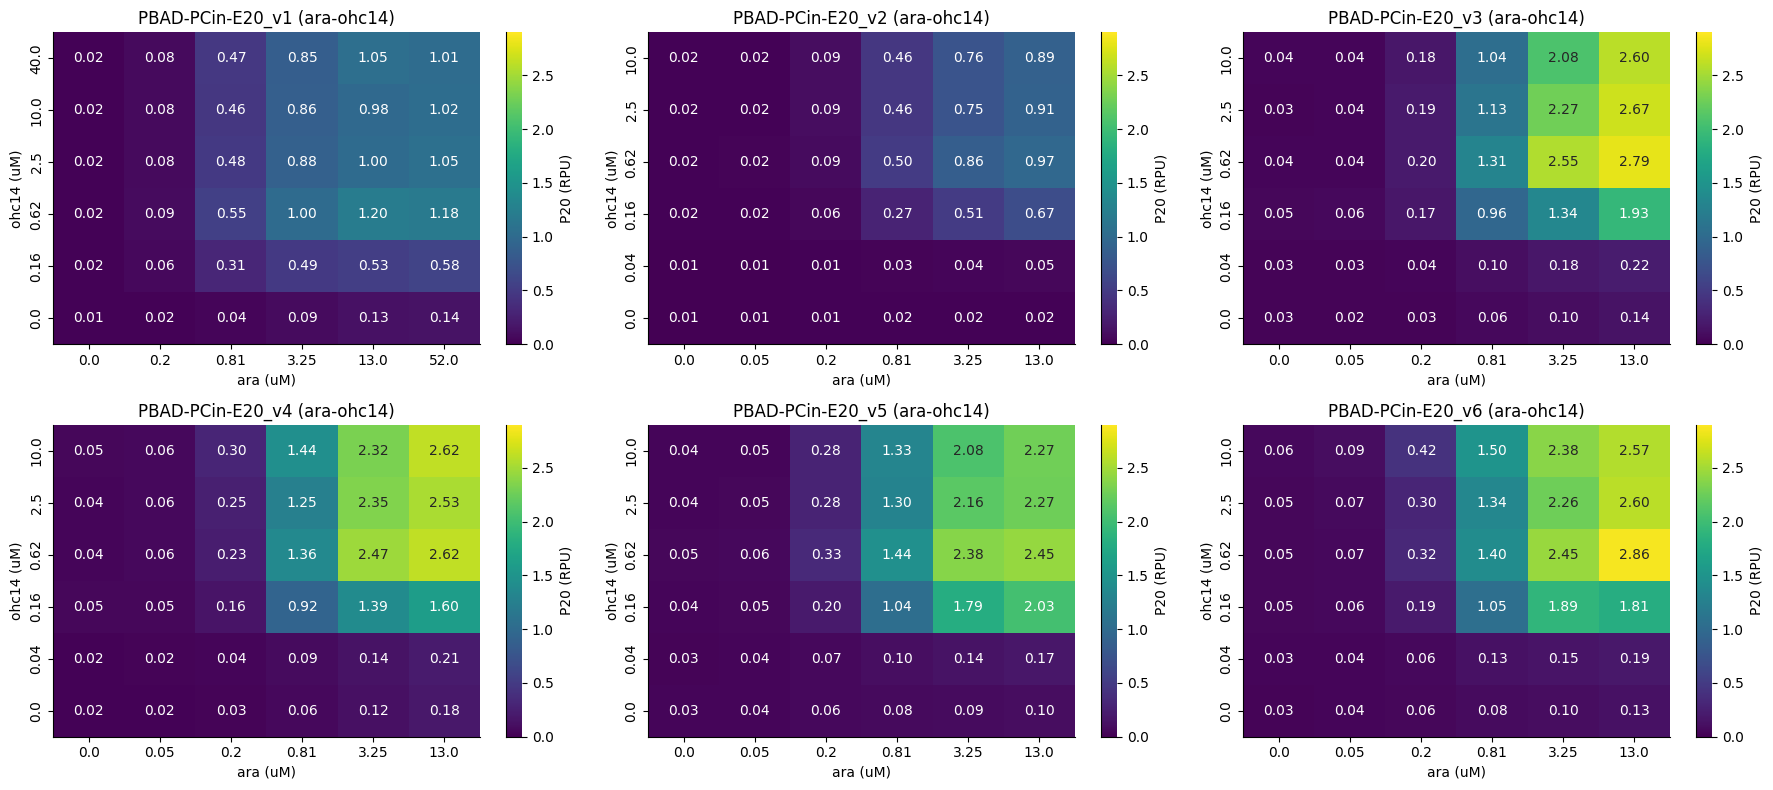

In [27]:
def plot_2d_data(filenames, v1, vx, title='E20', plot_type='colormesh'):

    row, col = 2, 3
    f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*4))
    for i, ax in enumerate(axs.ravel()):

        if i<len(filenames):

            filename = filenames[i]
            #gates = pd.read_csv('{}/{}/{}.csv'.format(folder, subfolder, filename))
            if filename == 'PBAD-PCin-E20_v1':
                gates = v1.copy()
            else:
                gates = vx[['ara', 'ohc14', filename]]
            
            ind_cols = gates.columns[:2].tolist()
            gate_cols = gates.columns[2:].tolist()
            ind_concentrations = gates[ind_cols[0]].unique(), gates[ind_cols[1]].unique()
            #first two-columns are inducers, get the RPU level from corresponding hill parameters
            for i in ind_cols:
                gates[i] = hill_activation_single(gates[i], *hill_params[pro_ind[i]])
            #the remaining columns are gates, could be one or multiple, turn them into a list and rename the fluo column
            gates_list = [gates[ind_cols+[g]].rename(columns={g:'fluo'}) for g in gate_cols]
            gates_log = [np.log10(g) for g in gates_list]
            
            #min_max = data['fluo'].min(), data['fluo'].max()
            #data['fluo'] = data['fluo'].apply(lambda x: (x-min_max[0])/(min_max[1]-min_max[0]))
            
            if plot_type=='colormesh':
                data = gates_log[0]
                p = ax.pcolormesh(data[ind_cols[0]].unique(), data[ind_cols[1]].unique(),
                                    data.pivot_table(index=ind_cols[1], columns=ind_cols[0]).values, cmap='viridis',
                                    vmin=-2.00, vmax=0.5)
                cbar = plt.colorbar(p, ax=ax)
                cbar.set_label('P20 (log RPU)')
                ax.set_xlabel('{} (log RPU)'.format(pro_ind[ind_cols[0]]))
                ax.set_ylabel('{} (log RPU)'.format(pro_ind[ind_cols[1]]))
            else:
                data = gates_list[0]
                sns.heatmap(data.pivot_table(index=ind_cols[1], columns=ind_cols[0]).values,
                            annot=True, fmt='.2f', vmin=0.00, vmax=2.90, cmap='viridis', ax=ax, 
                            cbar_kws={'label': 'P20 (RPU)'}).invert_yaxis()
                ax.set_xticklabels(np.round(ind_concentrations[0], 2))
                ax.set_yticklabels(np.round(ind_concentrations[1], 2))
                ax.set_xlabel('{} (uM)'.format(ind_cols[0]))
                ax.set_ylabel('{} (uM)'.format(ind_cols[1]))
            
            ax.set_title('{} ({}-{})'.format(filename, *ind_cols))

            sns.despine()
            
        else:
            ax.set_visible(False)
             
    plt.tight_layout()
    
plot_2d_data(filenames, v1, data, plot_type='heatmap')

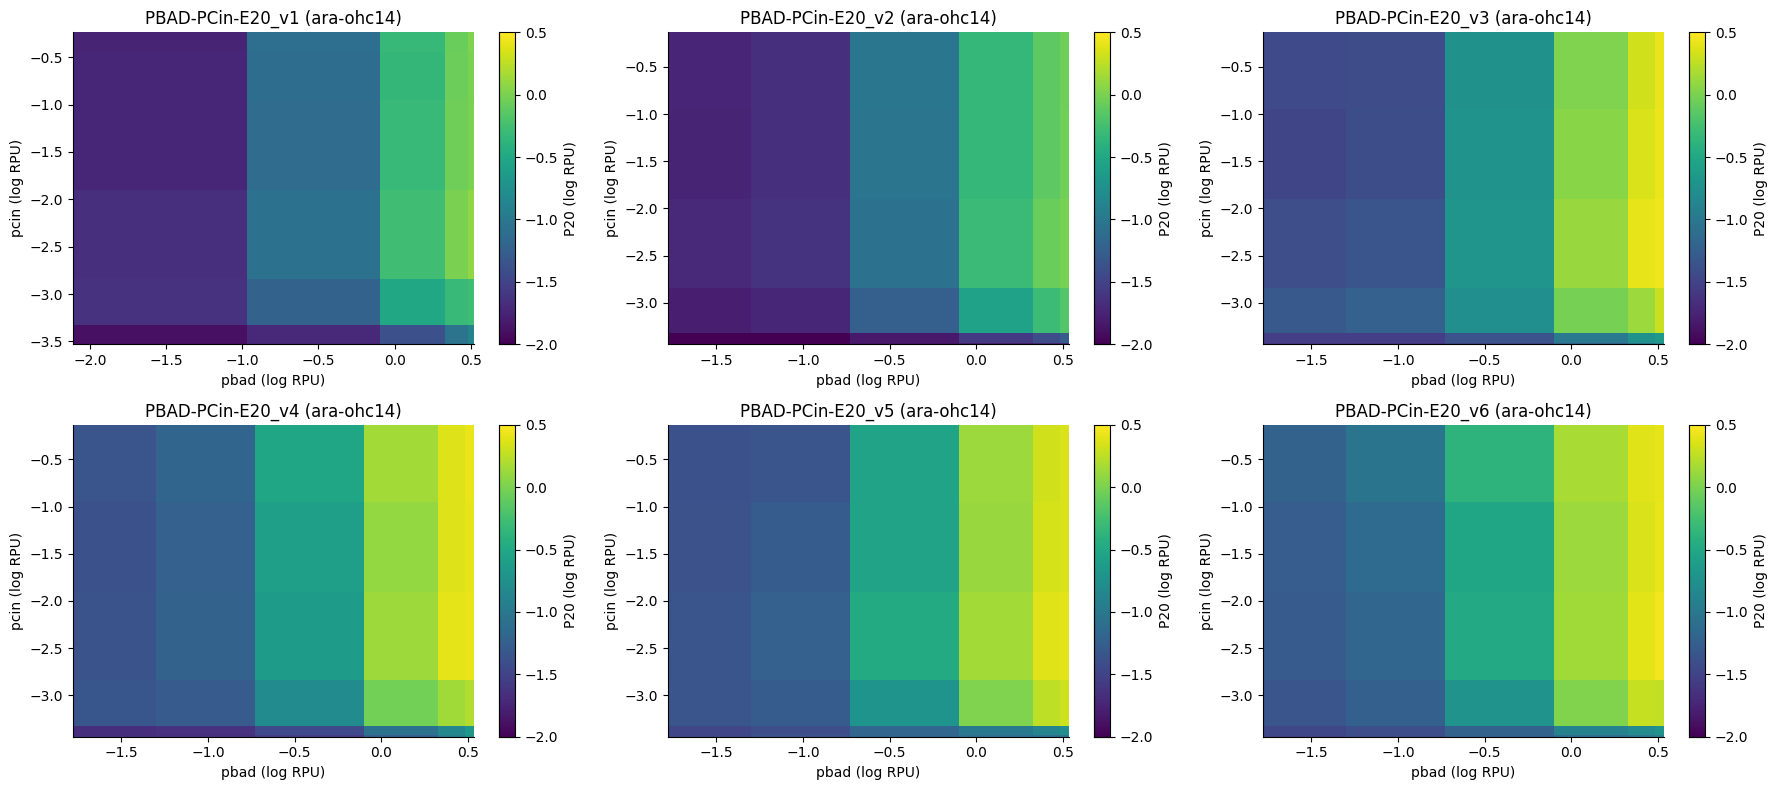

In [28]:
plot_2d_data(filenames, v1, data)

In [30]:
def fit_model(gates, model_name='GP', y_label='fluo', scale='log'):
    
    if scale=='log':
        gates_ = [np.log10(g) for g in gates]
    else:
        gates_ = gates.copy()
    
    models = []
    for gate in gates_:
        X = gate.drop(y_label, axis=1)
        y = gate[y_label]
        if model_name=='GP':
            model = gp.GaussianProcessRegressor()
        elif model_name=='GP+Noise':
            model = gp.GaussianProcessRegressor(kernel=WhiteKernel() + RBF(1, "fixed"))
        elif model_name=='NN':
            model = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(300, 300))
        
        model.fit(X, y)
        models.append(model)
        
    return models

In [31]:
def plot_decompose(model, data, title='E20', model_name='NN', scale='log', show_interval=False):
    
    if scale=='log':
        data = np.log10(data)
    
    #setup bounds for model
    inducers_lbl = data.columns[:2].tolist()
    i1 = data[inducers_lbl[0]].unique()
    i2 = data[inducers_lbl[1]].unique()
    #if data is already in log-scale, then the model is generated in linear-scale
    ind1 = np.linspace(i1.min(), i1.max(), 1000)
    ind2 = np.linspace(i2.min(), i2.max(), 1000)
    
    row, col = 1, 2
    f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*4))
    ax = axs.ravel()

    fixed = inducers_lbl[0]
    varied = inducers_lbl[1]
    
    #prediction
    pred_data = pd.DataFrame(itertools.product(i1, ind2), columns=inducers_lbl)
    if show_interval:
        pred_data['fluo'], pred_data['fluo_std'] = model.predict(pred_data, return_std=True)
    else:
        pred_data['fluo'] = model.predict(pred_data)
        
    num_col_palette = len(data[fixed].unique())-1
    for x, i in enumerate(data[fixed].unique()):
        
        act = data[data[fixed]==i]
        ax[0].scatter(act[varied], act['fluo'], color=cmap(x/num_col_palette))
        pred = pred_data[pred_data[fixed]==i]
        ax[0].plot(pred[varied], pred['fluo'], color=cmap(x/num_col_palette), label=np.round(i, 2))
        if show_interval:
            ax[0].fill_between(
                pred[varied],
                pred['fluo'] - 1.96 * pred['fluo_std'],
                pred['fluo'] + 1.96 * pred['fluo_std'],
                alpha=0.2,
                color=cmap(x/num_col_palette)
            )
    ax[0].set_xlabel('{} (log RPU)'.format(pro_ind[varied]))
    ax[0].set_ylabel('P20 (log RPU)')
    ax[0].legend(title='{} (log RPU)'.format(pro_ind[fixed]), loc='center', bbox_to_anchor=(0.5, 1.15), ncol=int(len(i2)/1))

    fixed = inducers_lbl[1]
    varied = inducers_lbl[0]
    
    pred_data = pd.DataFrame(itertools.product(ind1, i2), columns=inducers_lbl)
    if show_interval:
        pred_data['fluo'], pred_data['fluo_std'] = model.predict(pred_data, return_std=True)
    else:
        pred_data['fluo'] = model.predict(pred_data)
    
    num_col_palette = len(data[fixed].unique())-1
    for x, i in enumerate(data[fixed].unique()):
        
        act = data[data[fixed]==i]
        ax[1].scatter(act[varied], act['fluo'], color=cmap(x/num_col_palette))
        
        pred = pred_data[pred_data[fixed]==i]
        ax[1].plot(pred[varied], pred['fluo'], color=cmap(x/num_col_palette), label=np.round(i, 2))
        if show_interval:
            ax[1].fill_between(
                pred[varied],
                pred['fluo'] - 1.96 * pred['fluo_std'],
                pred['fluo'] + 1.96 * pred['fluo_std'],
                alpha=0.2,
                color=cmap(x/num_col_palette)
            )
    ax[1].set_xlabel('{} (log RPU)'.format(pro_ind[varied]))
    ax[1].set_ylabel('P20 (log RPU)')
    ax[1].legend(title='{} (log RPU)'.format(pro_ind[fixed]), loc='center', bbox_to_anchor=(0.5, 1.15), ncol=int(len(i2)/1))

    plt.suptitle('{} ({}-{})'.format(title, *inducers_lbl))
    plt.tight_layout()
    sns.despine()

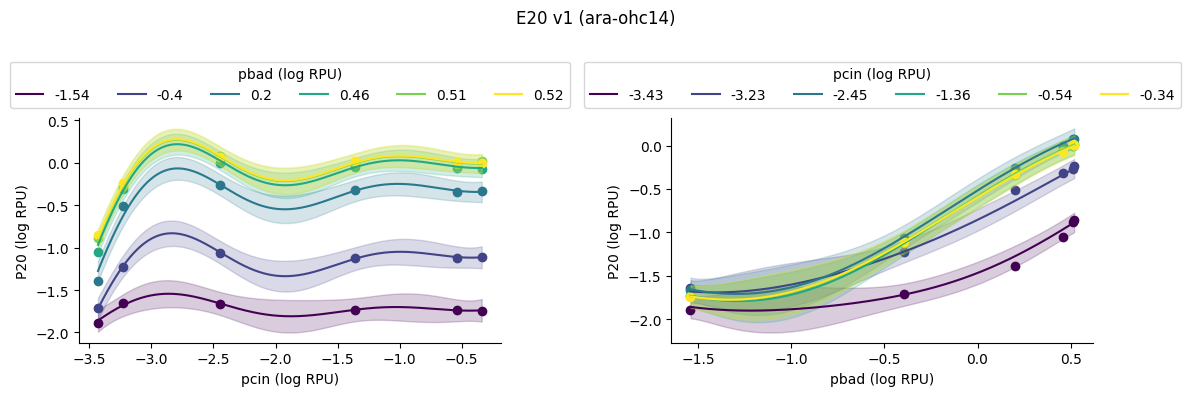

In [37]:
filename = 'PBAD-PCin-E20_v1'
model_name = 'GP+Noise'
gates = v1.copy()#pd.read_csv('{}/{}/{}.csv'.format(folder, subfolder, filename))
ind_cols = gates.columns[:2].tolist()
gate_cols = gates.columns[2:].tolist()
#first two-columns are inducers, get the RPU level from corresponding hill parameters
for i in ind_cols:
    gates[i] = hill_activation_single(gates[i], *hill_params[pro_ind[i]])
#the remaining columns are gates, could be one or multiple, turn them into a list and rename the fluo column
gates_list = [gates[ind_cols+[g]].rename(columns={g:'fluo'}) for g in gate_cols]
#gates_log = [np.log10(g) for g in gates_list]
models = fit_model(gates_list, model_name=model_name)

plot_decompose(models[0], gates_list[0], title='E20 v1', model_name=model_name, show_interval=True)

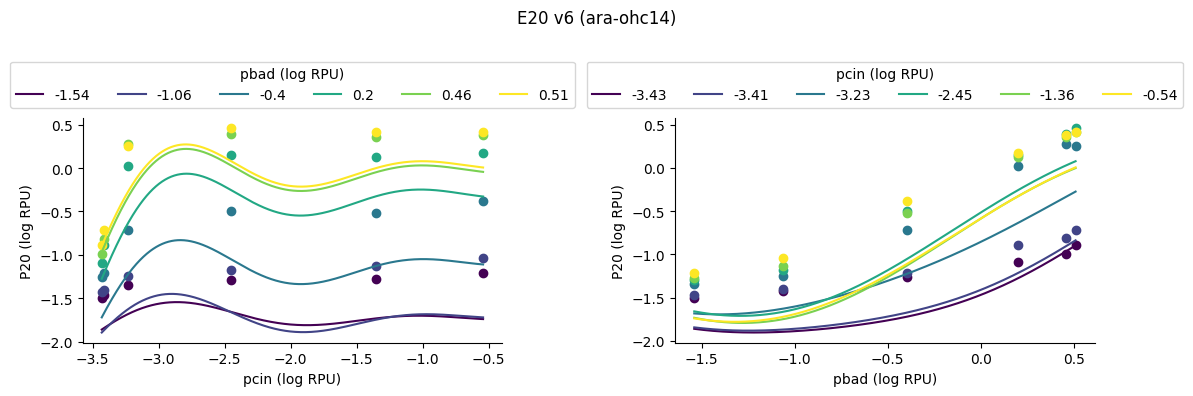

In [42]:
filename = 'PBAD-PCin-E20_v6'
gates = data[['ara', 'ohc14', filename]]
ind_cols = gates.columns[:2].tolist()
gate_cols = gates.columns[2:].tolist()
#first two-columns are inducers, get the RPU level from corresponding hill parameters
for i in ind_cols:
    gates[i] = hill_activation_single(gates[i], *hill_params[pro_ind[i]])
#the remaining columns are gates, could be one or multiple, turn them into a list and rename the fluo column
gates_list = [gates[ind_cols+[g]].rename(columns={g:'fluo'}) for g in gate_cols]

plot_decompose(models[0], gates_list[0], title='E20 v6', model_name=model_name, show_interval=False)